# Churn Classification at a Bank

# Introduction
We are data scientists at a bank. The churn rate has been higher than before, so our team was asked to help answer some questions and try to build a model to predict the probability of customers leaving our services.

# Business questions

- What is the Credit score of people who exited?
- In which country did we have higher churn?
- How many products do exited people have?
- What is the average age of people who exited?
- Which feature has the higher correlation with Exit status?
- Can we predict this churn?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data aquisition

In [2]:
df_train = pd.read_csv('/kaggle/input/bank-churn/train.csv')
df_test = pd.read_csv('/kaggle/input/bank-churn/test.csv')

Let's learn some information about train data

# Checking data information

There are no null values for this train dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


columns that is not important for this project will be removed

In [5]:
df_train.drop(columns=['id','CustomerId','Surname'], inplace = True)
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 122'. Pick better value with 'binwidth'.


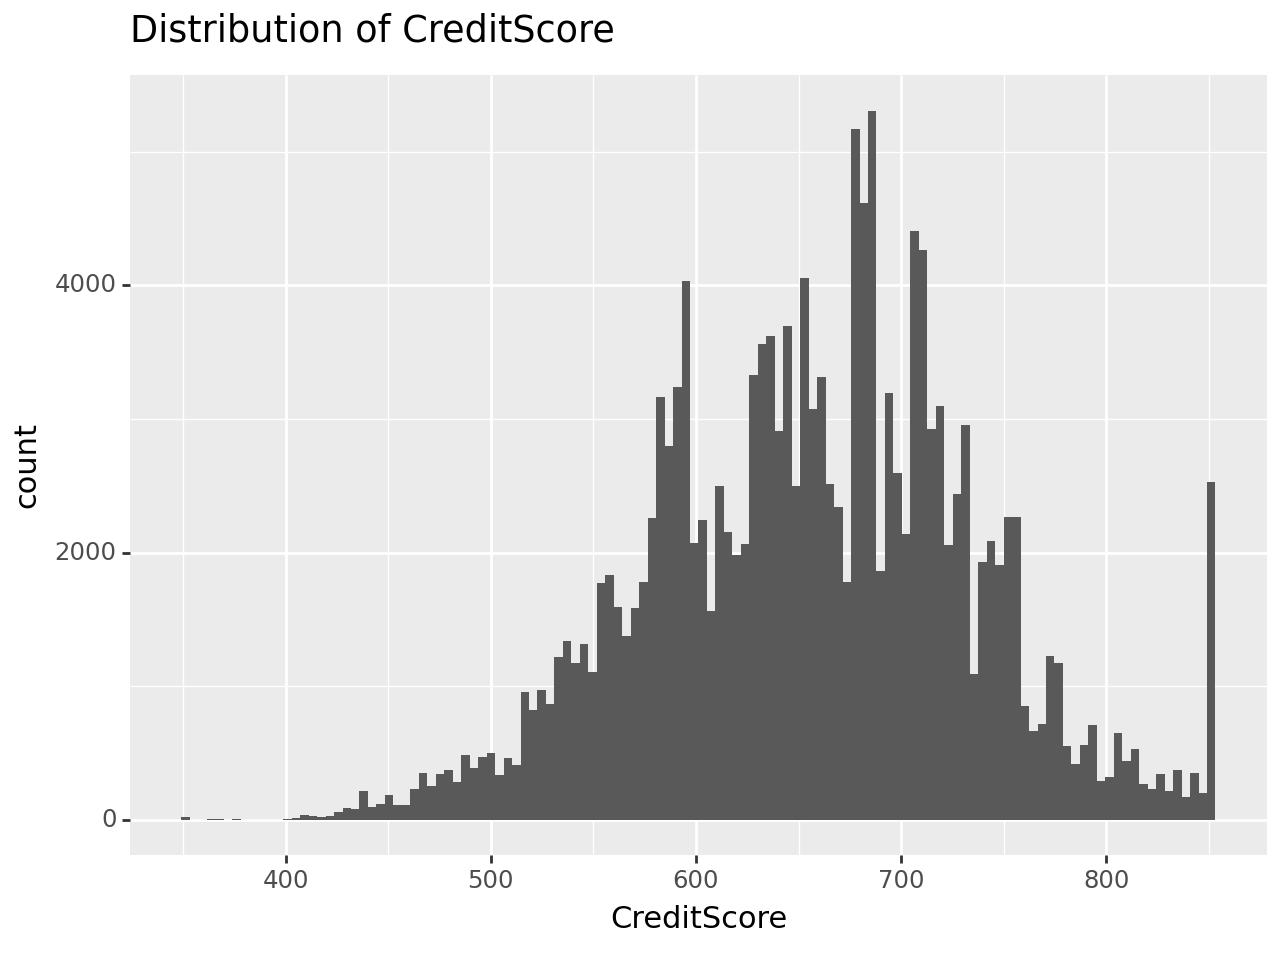

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 203'. Pick better value with 'binwidth'.


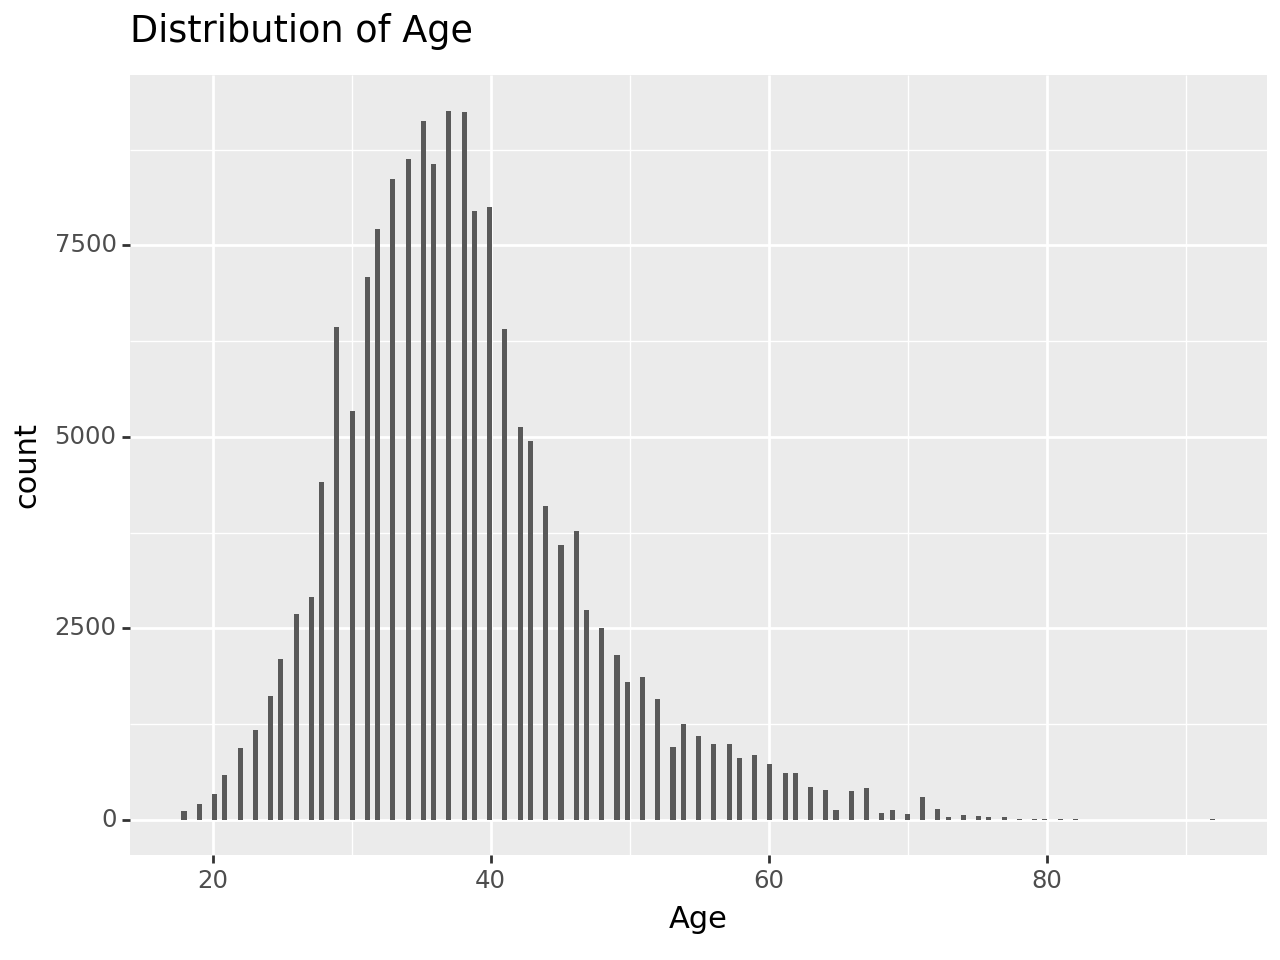

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 69'. Pick better value with 'binwidth'.


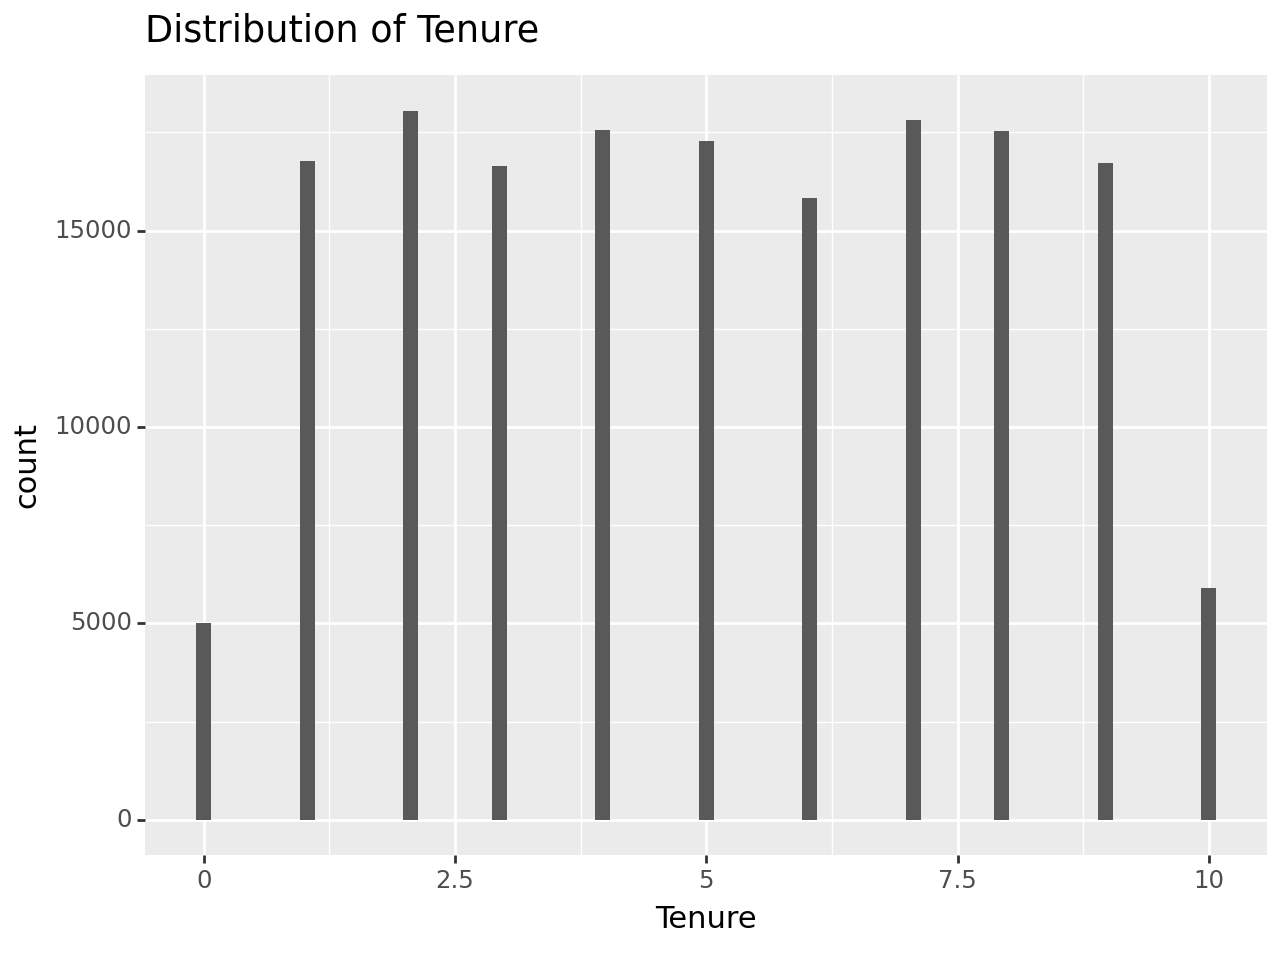

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 58'. Pick better value with 'binwidth'.


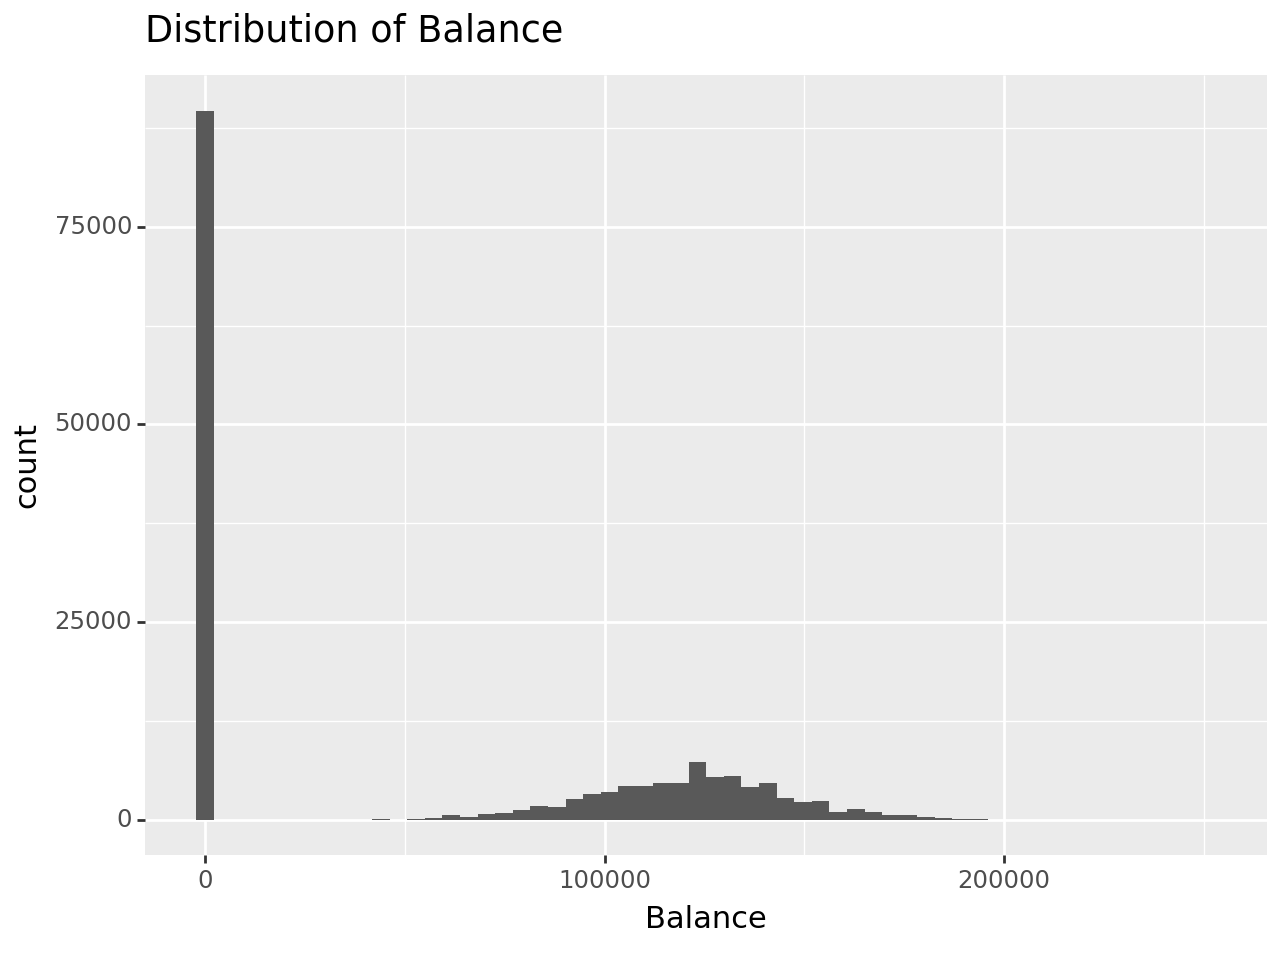

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 83'. Pick better value with 'binwidth'.


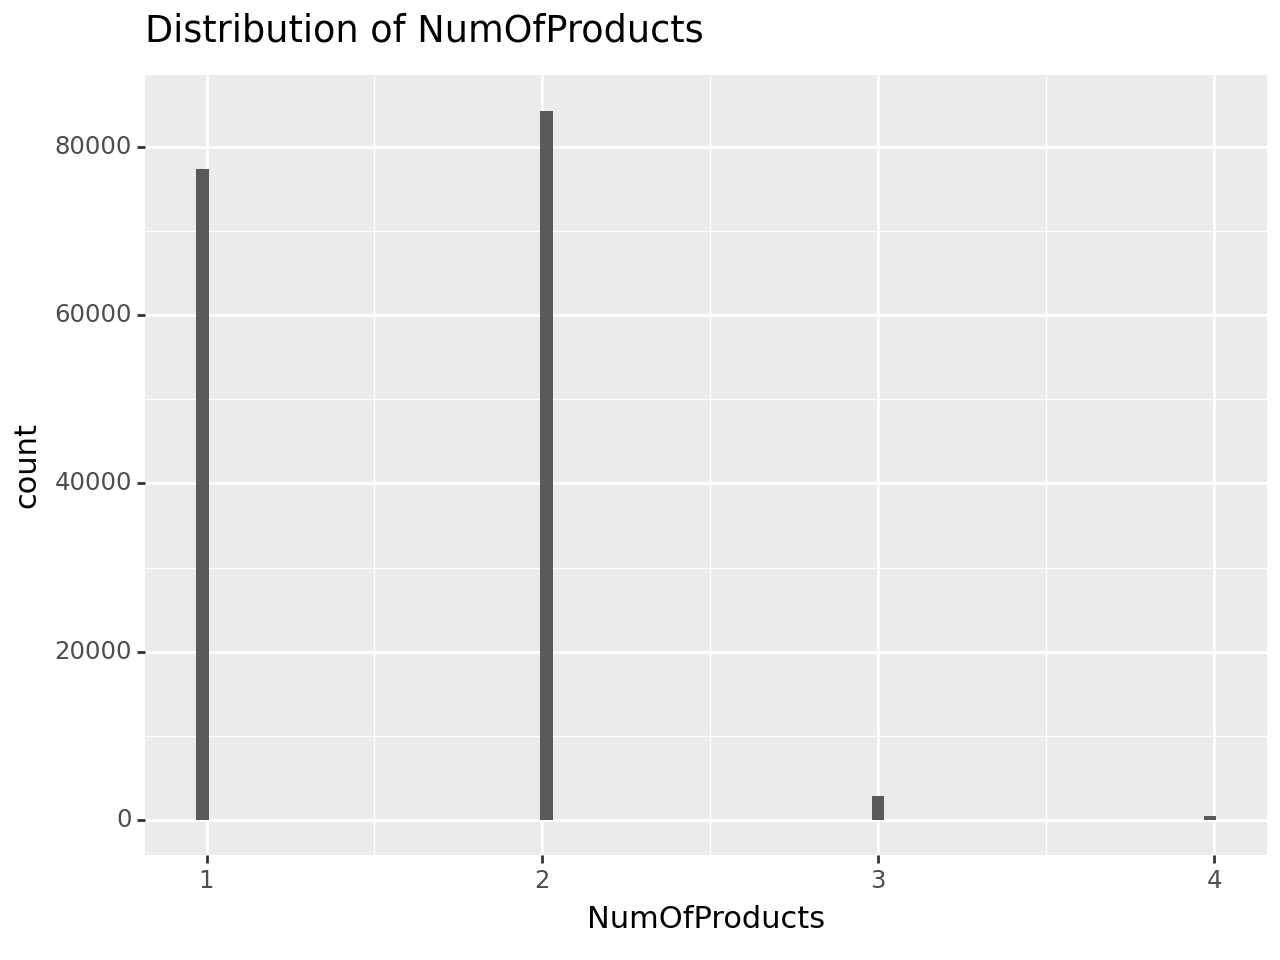

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 407'. Pick better value with 'binwidth'.


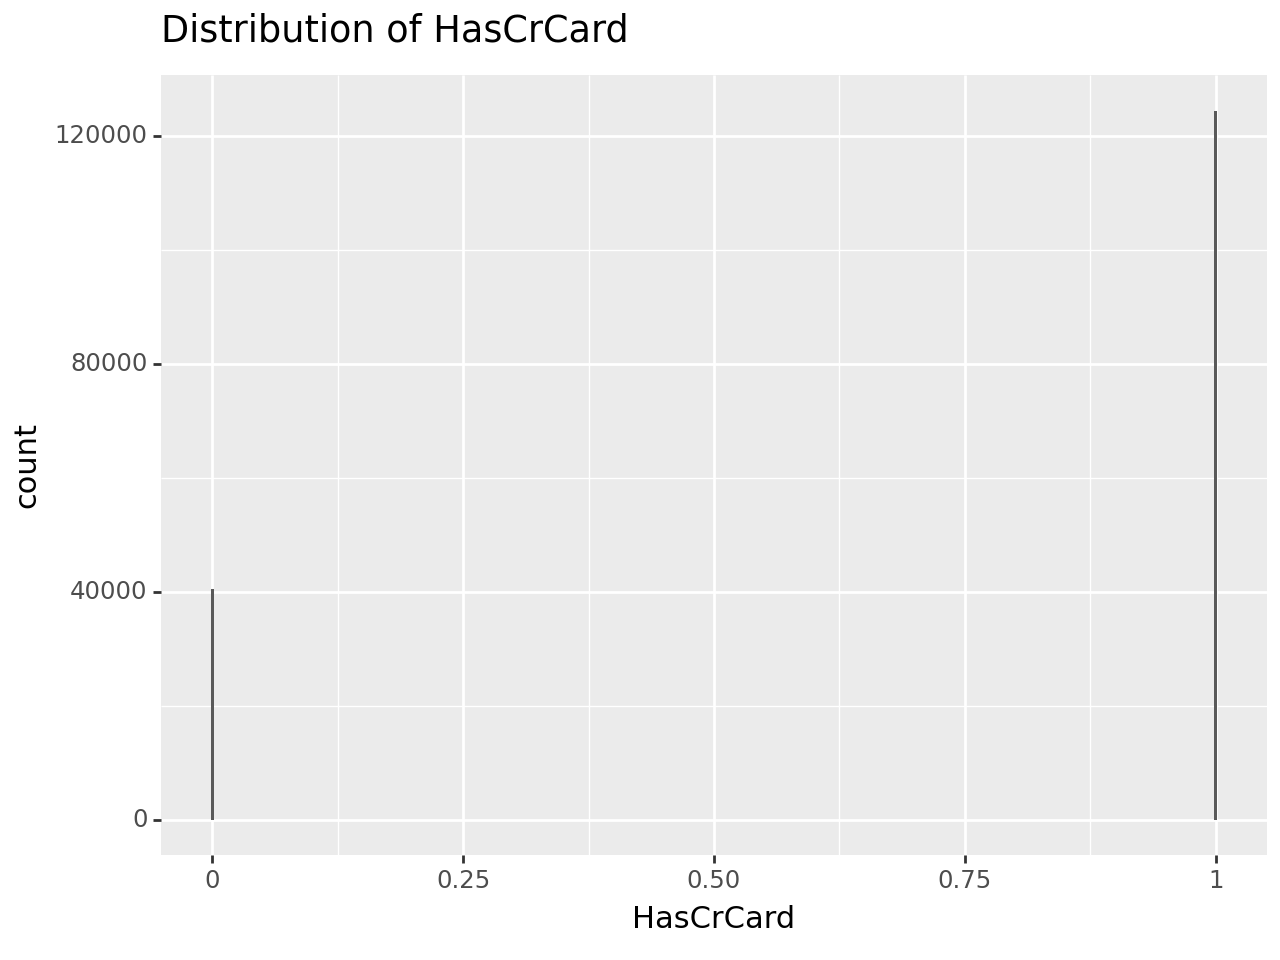

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 28'. Pick better value with 'binwidth'.


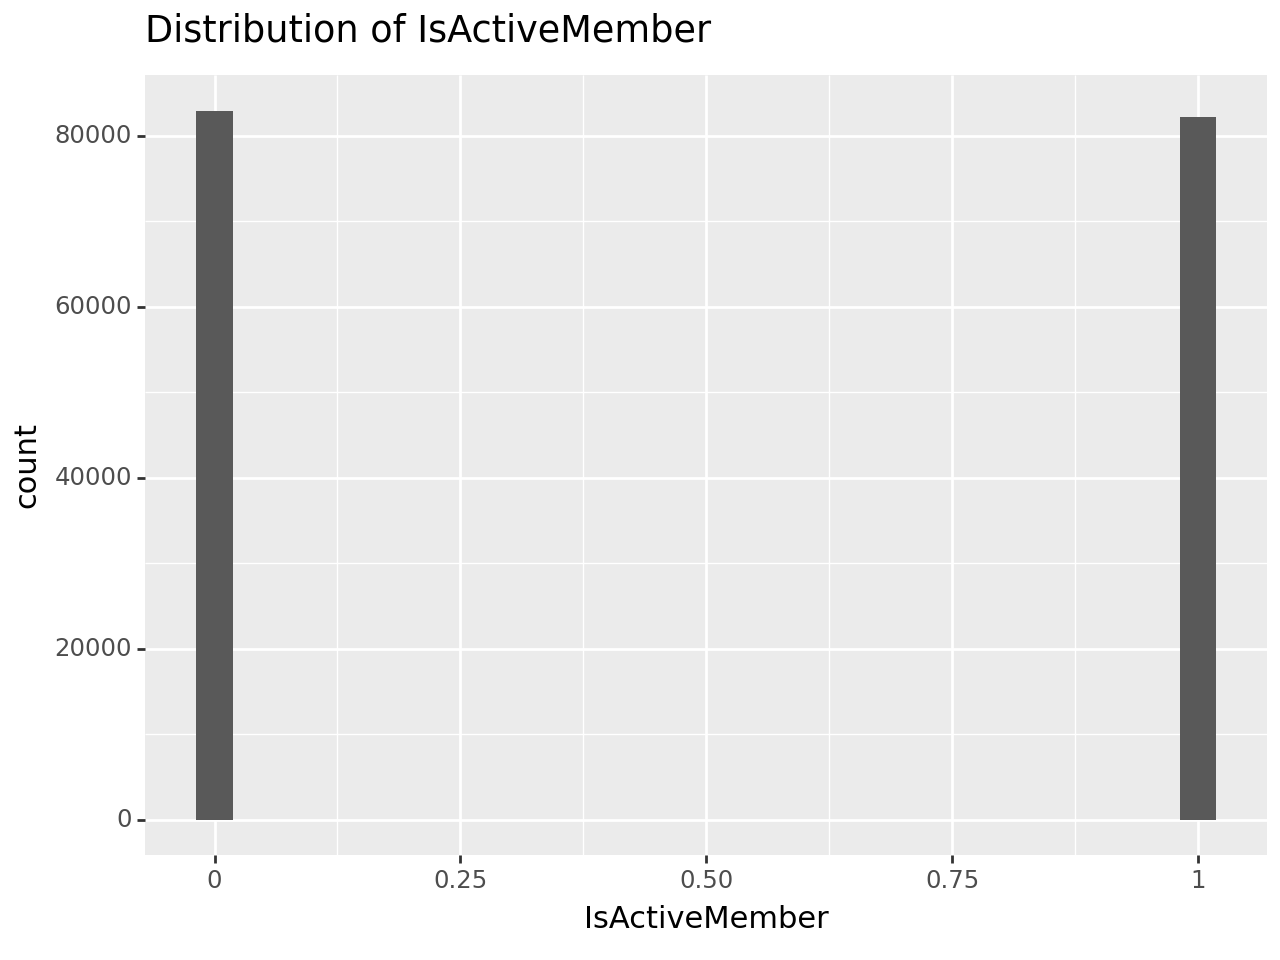

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 69'. Pick better value with 'binwidth'.


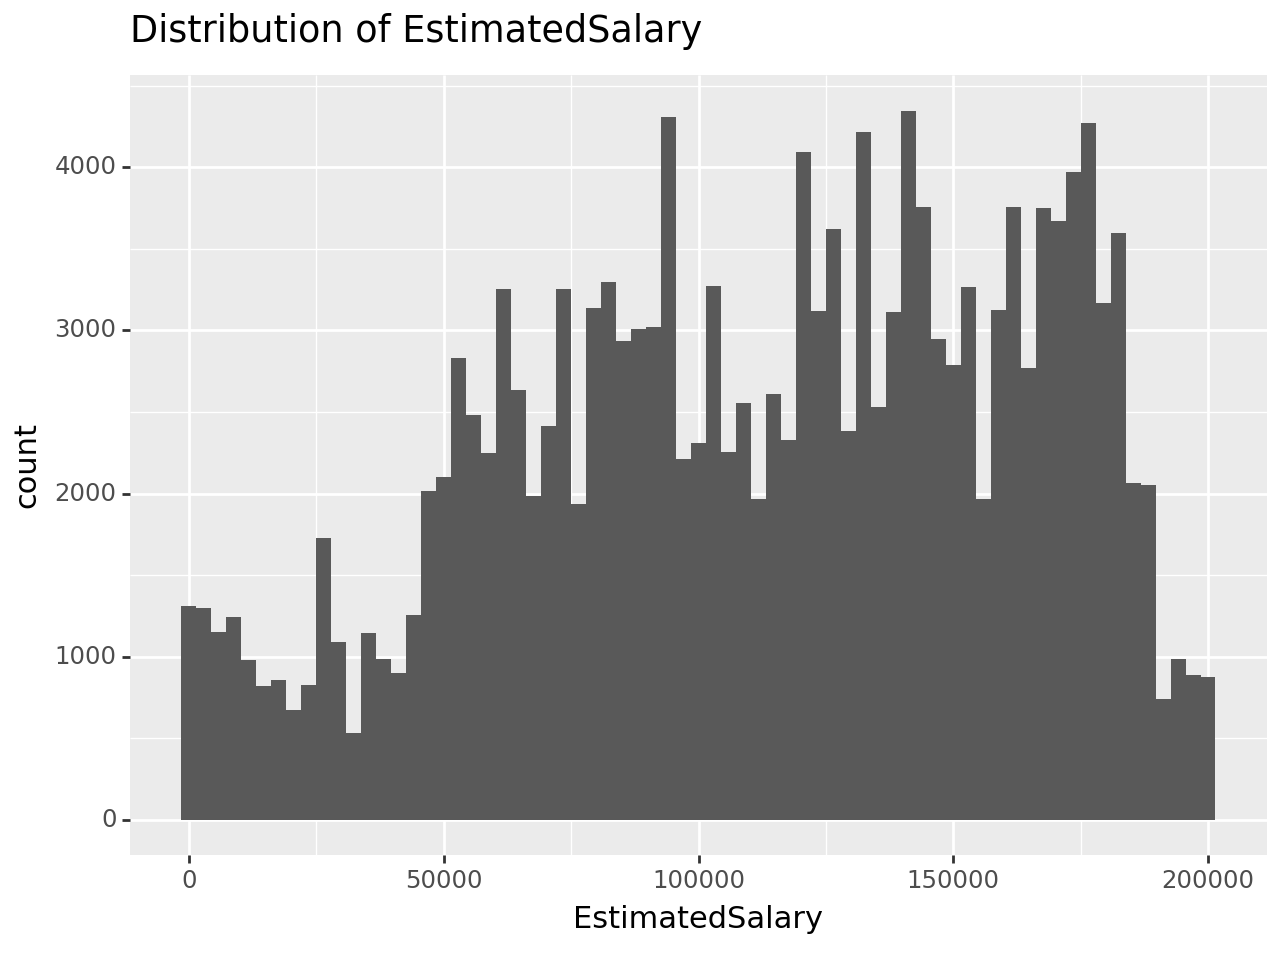

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 407'. Pick better value with 'binwidth'.


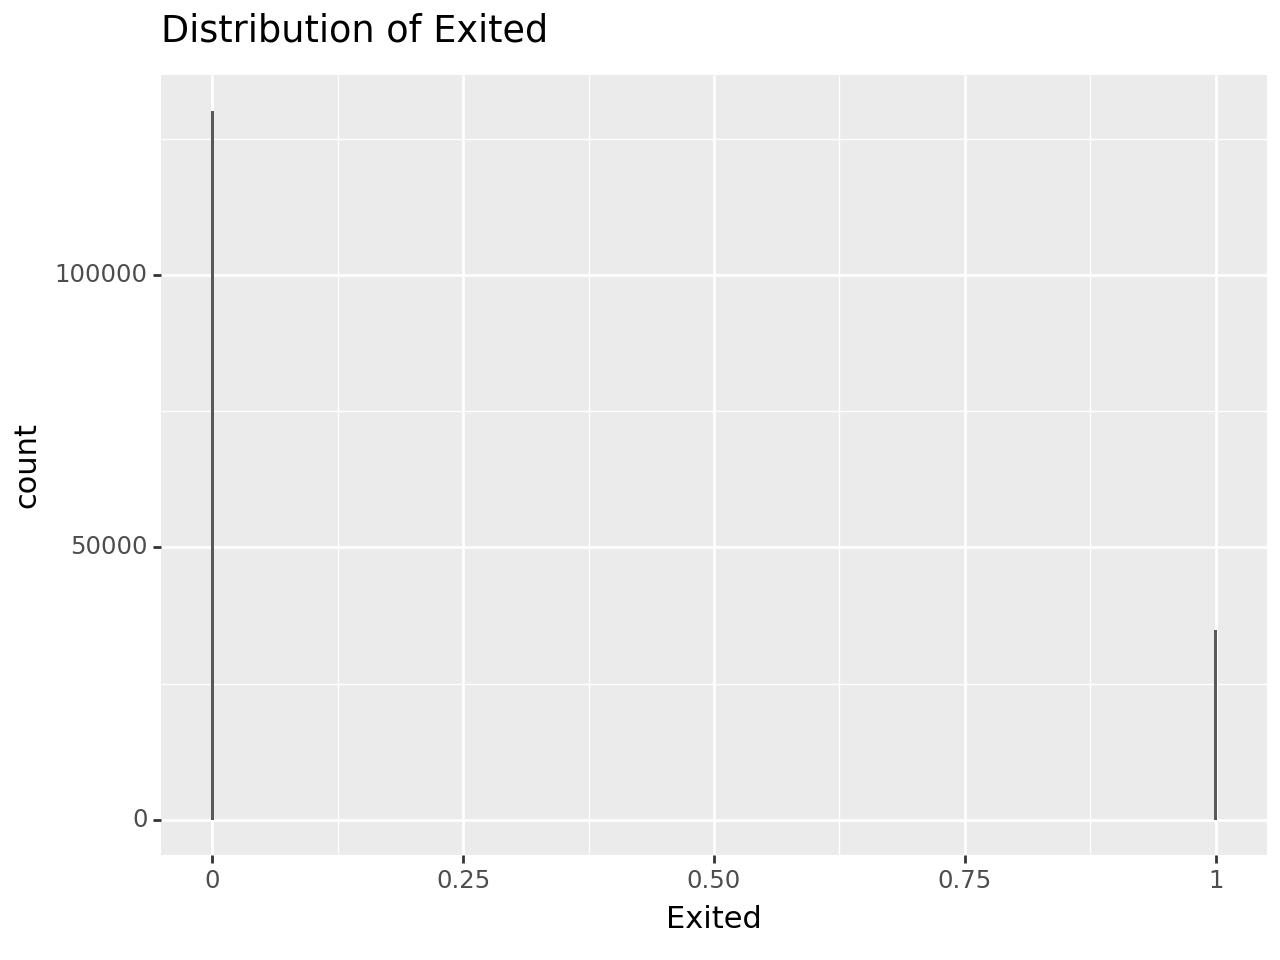

In [6]:
for col in df_train.select_dtypes(exclude='object'):
  print(ggplot(data = df_train)
    + geom_histogram(aes(col))
    + ggtitle(f'Distribution of {col}'))

### Observations
- On Credit Score distribution we can see that credit score is between 600 and 700 points and most part of customers are about 680 points.
- Per Age we can see that costumers are at most between 25 and 45 years old
- Balance is highly concentrate in zero
- Most part of the customers have just one or two products
- We have 120k customers with credit card against 40k
- Estimated Salary are concentrate between 75k and 150k
- We have in train data more than 120k customers lost

# Answering Business questions

### What is the Credit score of people who exited?

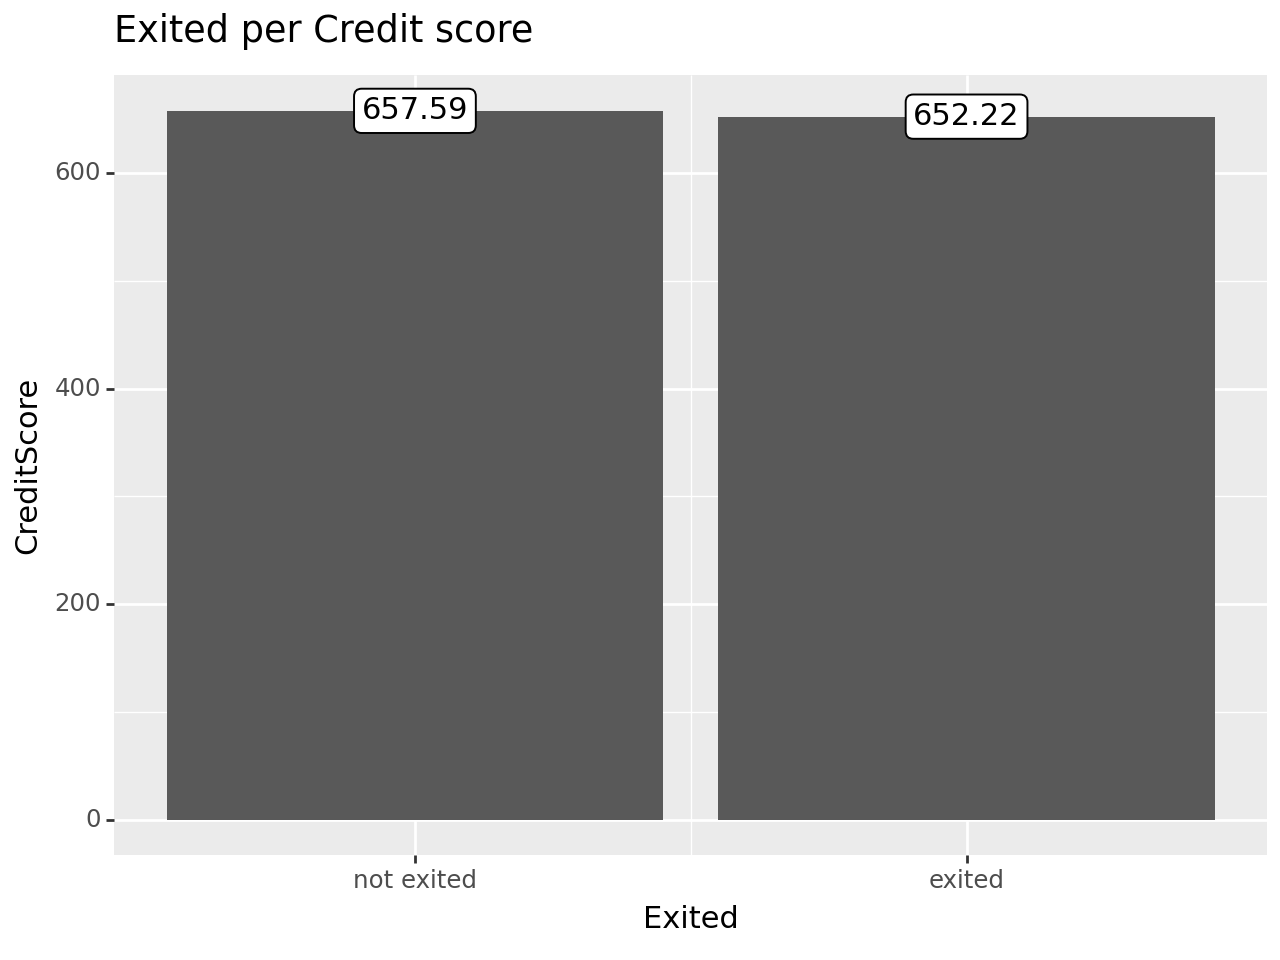

<Figure Size: (640 x 480)>

In [7]:
df_grouped = df_train.groupby('Exited')[['CreditScore']].mean().reset_index()

(ggplot(df_grouped, aes('Exited','CreditScore'))
+ geom_col()
+ geom_label(aes(label = 'round(CreditScore, 2)'))
+ ggtitle('Exited per Credit score')
+ scale_x_continuous(breaks = [0,1], labels = {0:'not exited',1:'exited'}, )
)

In [8]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### In which country did we have higher churn?

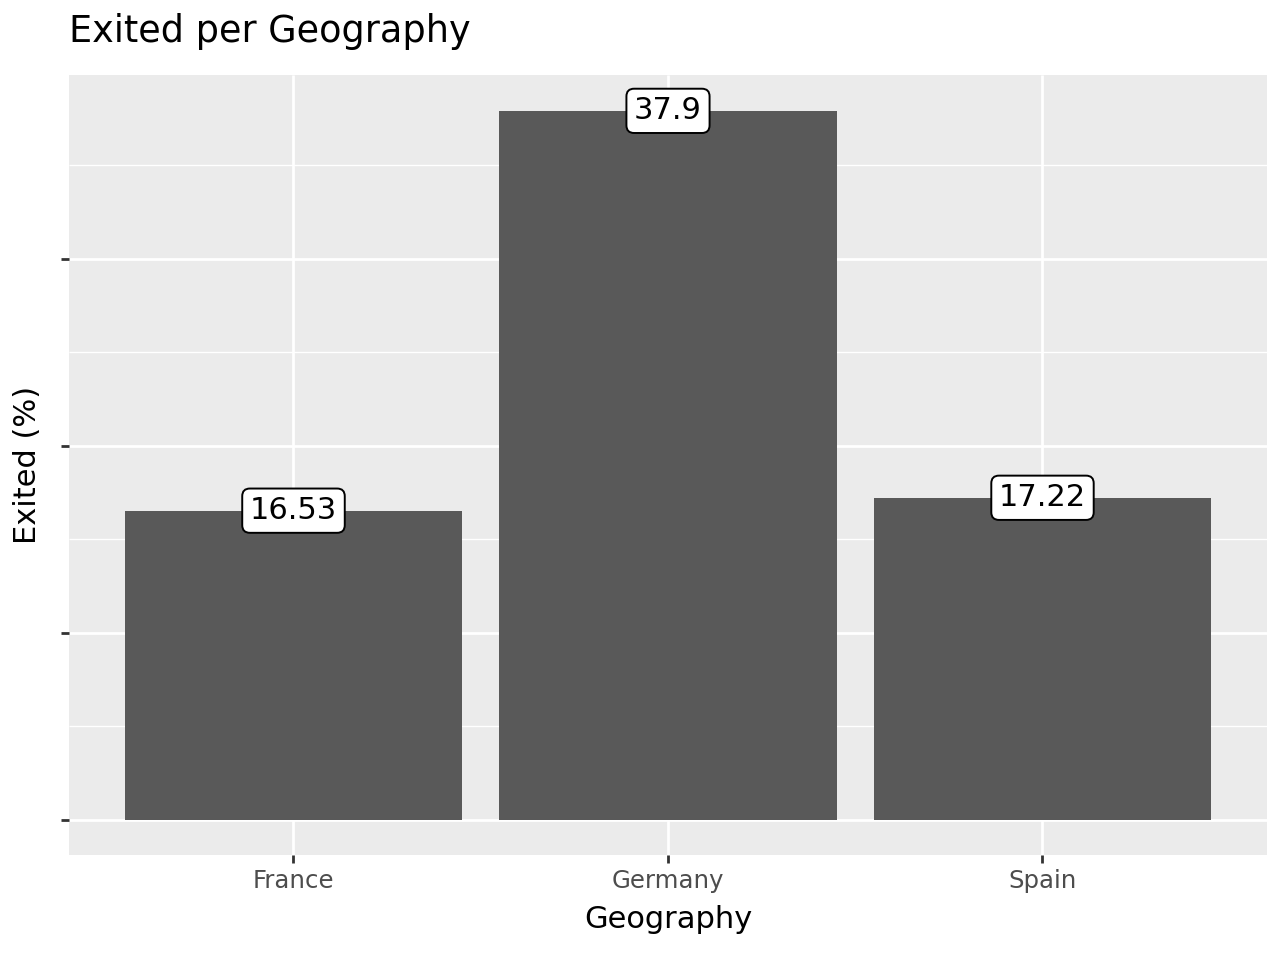

<Figure Size: (640 x 480)>

In [9]:
df_grouped = df_train.groupby('Geography')[['Exited']].mean().reset_index()

(ggplot(df_grouped, aes('Geography','Exited'))
+ geom_col()
+ geom_label(aes(label = 'round((Exited * 100),2)'))
+ ggtitle('Exited per Geography')
+ ylab('Exited (%)')
+ theme( axis_text_y = element_blank())
)

### How many products do exited people have?

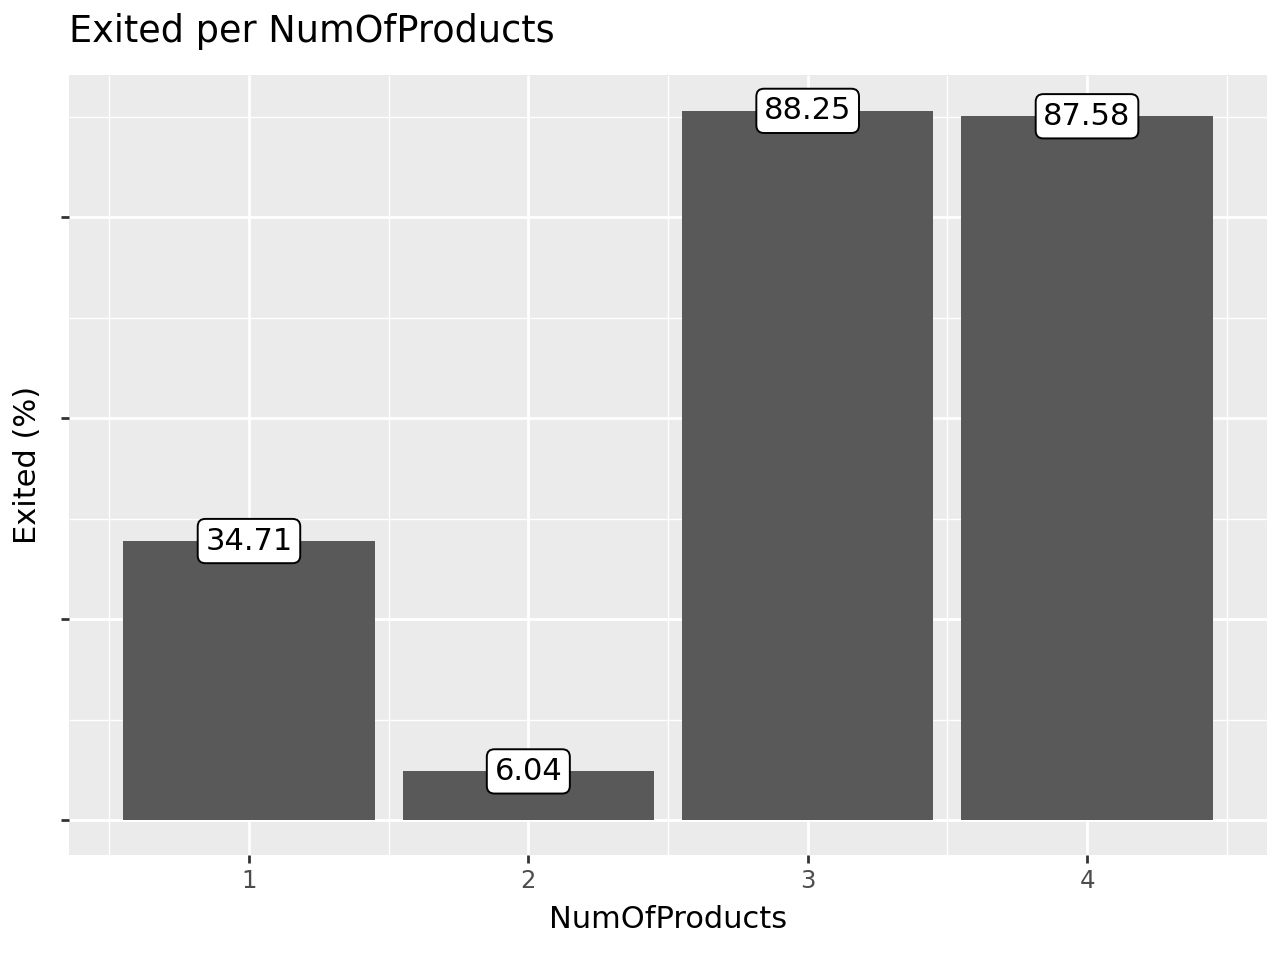

<Figure Size: (640 x 480)>

In [10]:
df_grouped = df_train.groupby('NumOfProducts')[['Exited']].mean().reset_index()

(ggplot(df_grouped, aes('NumOfProducts','Exited'))
+ geom_col()
+ geom_label(aes(label = 'round((Exited * 100),2)'))
+ ggtitle('Exited per NumOfProducts')
+ ylab('Exited (%)')
+ theme( axis_text_y = element_blank())
)

**❗People who exited had 3 or 4 products it's a big problem❗**

### What is the average age of people who exited?

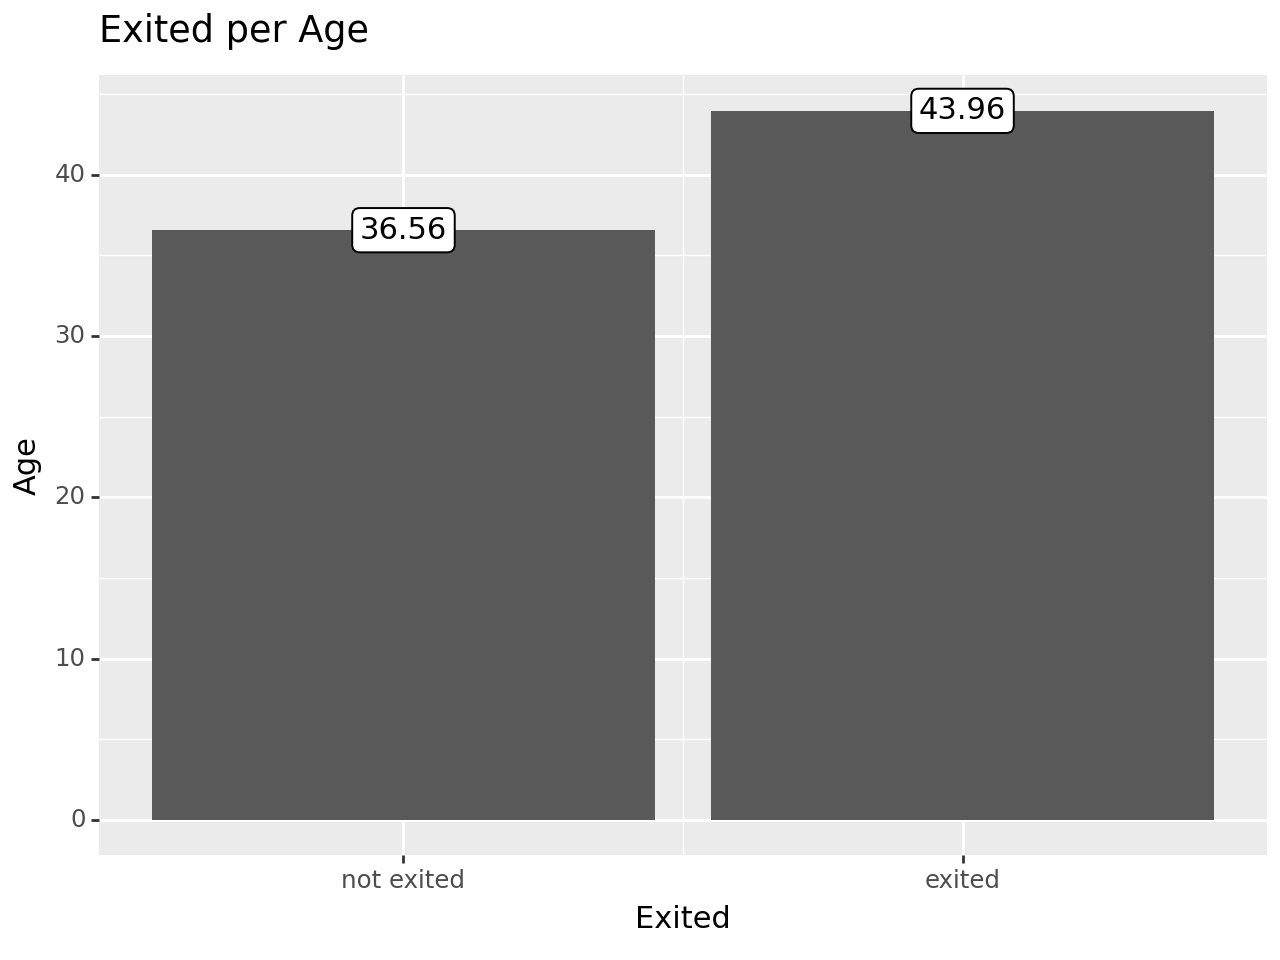

<Figure Size: (640 x 480)>

In [11]:
df_grouped = df_train.groupby('Exited')[['Age']].mean().reset_index()

(ggplot(df_grouped, aes('Exited','Age'))
+ geom_col()
+ geom_label(aes(label = 'round(Age,2)'))
+ ggtitle('Exited per Age')
+ scale_x_continuous(breaks = [0,1], labels = {0:'not exited',1:'exited'}, )
)

### Which feature has the higher correlation with Exit status?

Let's transform data for dummies to get a complete correlation matrix

<Axes: >

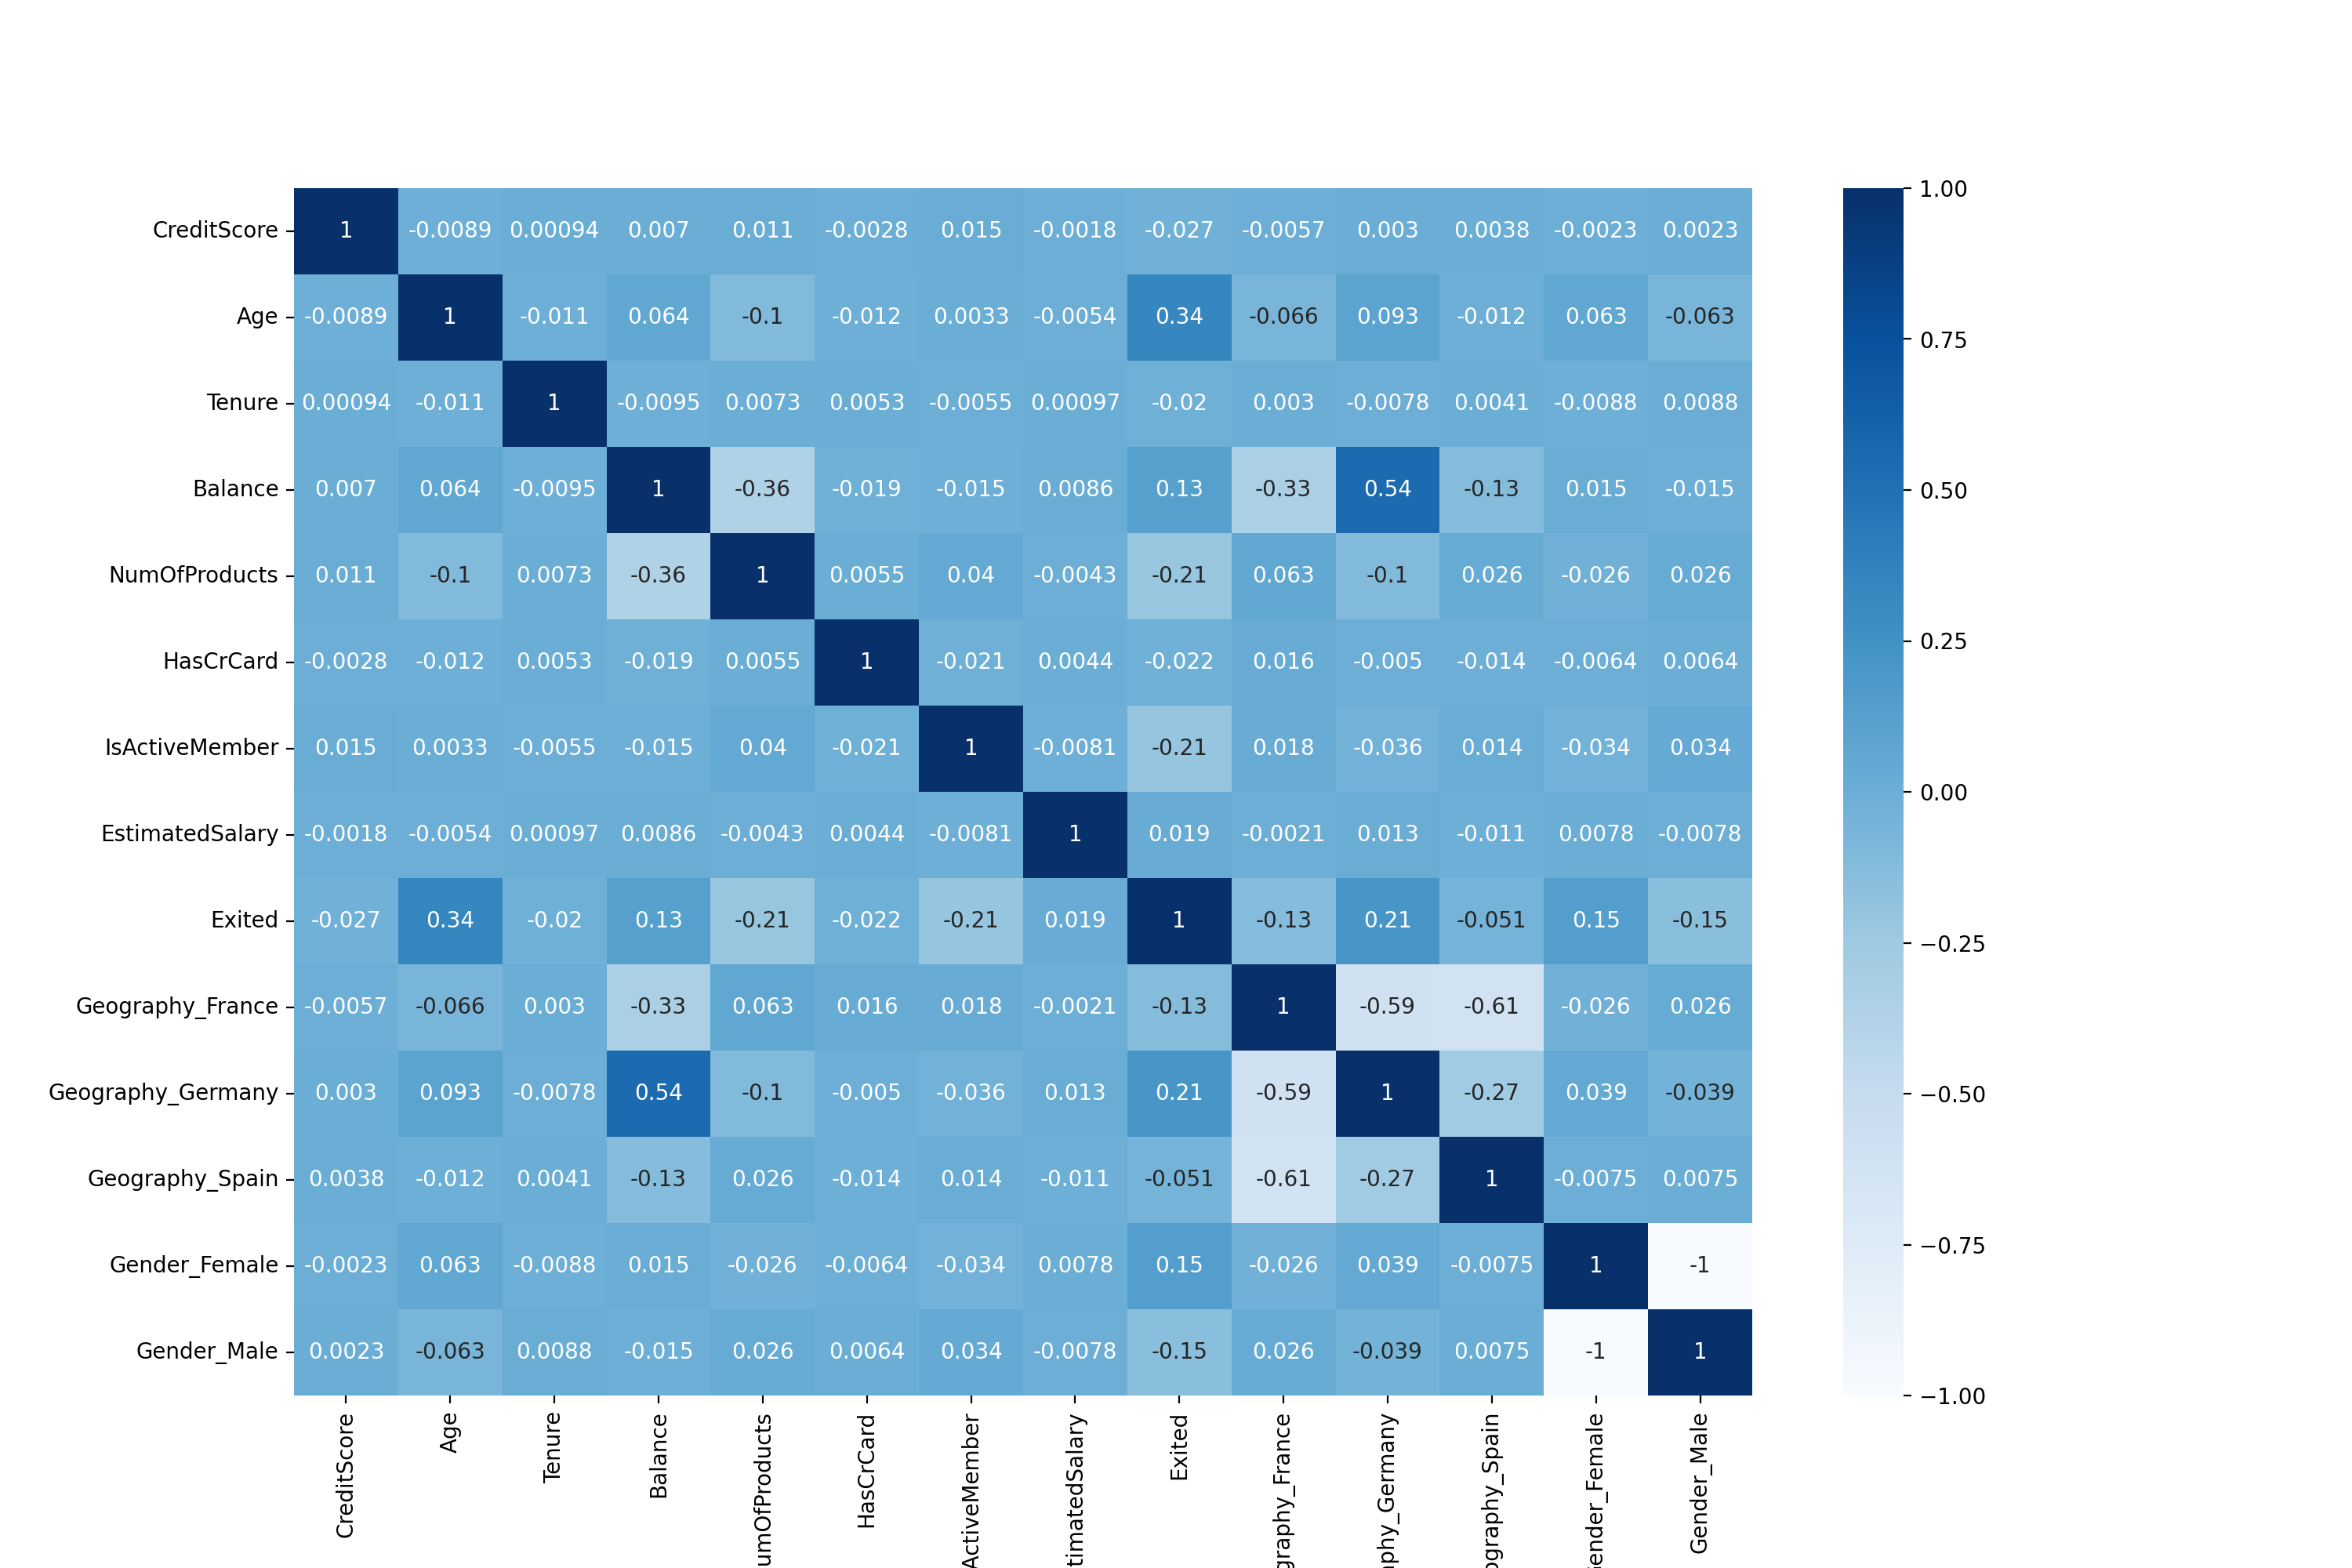

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.get_dummies(df_train).corr(), annot= True, cmap = 'Blues')

The highest correlated feature with Exit status is "Age".

## Preprocessing Data

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

We don't have Exited column on test data, so we are going to use part of df_train as validation data

In [14]:
Y = df_train['Exited']
X = df_train.drop('Exited', axis = 1)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, stratify = df_train['Exited'])

In [15]:
encoder = OneHotEncoder()
scaler = StandardScaler()

In [16]:
cat_cols = x_train.select_dtypes(include = 'object').columns
num_cols = x_train.select_dtypes(exclude = 'object').columns

In [17]:
preproc = ColumnTransformer([('encoder', encoder, cat_cols),
                       ('scaler',scaler, num_cols)])

In [18]:
pipe_rfc = Pipeline([('preproc',preproc),
               ('classifier',RandomForestClassifier())])

pipe_knc = Pipeline([('preproc',preproc),
               ('classifier',KNeighborsClassifier())])

pipe_lr = Pipeline([('preproc',preproc),
               ('classifier',LogisticRegression())])

In [19]:
grid_rfc = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [2,5,7]
}

grid_knc = {
    'classifier__n_neighbors' : [3,5,7,9]
}

grid_lr = {
    'classifier__C': [0.5, 1, 2],
    'classifier__tol': [0.01, 0.02, 0.03]
}

In [20]:
grid_search_rfc = GridSearchCV(pipe_rfc, grid_rfc, cv=5, scoring='recall', n_jobs= -1)
grid_search_rfc.fit(x_train, y_train)
grid_search_rfc.score(x_train, y_train)


0.46528942524033545

In [21]:
grid_search_lr = GridSearchCV(pipe_lr, grid_lr, cv=5, scoring = 'recall', n_jobs= -1)
grid_search_lr.fit(x_train, y_train)
grid_search_lr.score(x_train, y_train)


0.3819185927592555

In [22]:
grid_search_knc = GridSearchCV(pipe_knc, grid_knc, cv=5, scoring = 'recall', n_jobs= -1)
grid_search_knc.fit(x_train, y_train)
grid_search_knc.score(x_train, y_train)


0.6939660462262222

In [23]:
rf_preds = cross_val_predict(grid_search_rfc.best_estimator_, x_train, y_train)
lr_preds = cross_val_predict(grid_search_lr.best_estimator_, x_train, y_train)
knc_preds = cross_val_predict(grid_search_knc.best_estimator_, x_train, y_train)

# Evaluating Metrics

In [24]:
print(classification_report(y_train, rf_preds))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     91078
           1       0.79      0.45      0.58     24445

    accuracy                           0.86    115523
   macro avg       0.83      0.71      0.75    115523
weighted avg       0.85      0.86      0.84    115523



In [25]:
print(classification_report(y_train, lr_preds))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     91078
           1       0.70      0.38      0.49     24445

    accuracy                           0.83    115523
   macro avg       0.77      0.67      0.70    115523
weighted avg       0.82      0.83      0.81    115523



In [26]:
print(classification_report(y_train, knc_preds))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     91078
           1       0.64      0.54      0.58     24445

    accuracy                           0.84    115523
   macro avg       0.76      0.73      0.74    115523
weighted avg       0.83      0.84      0.83    115523



In [27]:
rf_probas = cross_val_predict(grid_search_rfc.best_estimator_, x_train, y_train, method='predict_proba')
lr_probas = cross_val_predict(grid_search_lr.best_estimator_, x_train, y_train, method='predict_proba')
knc_probas = cross_val_predict(grid_search_knc.best_estimator_, x_train, y_train, method='predict_proba')

In [28]:
print(
f'Random Forest AUC score: {roc_auc_score(y_train,rf_probas[:,1]):.2f}\nLogistic Regression AUC score: {roc_auc_score(y_train,lr_probas[:,1]):.2f}\nKneighbors AUC score: {roc_auc_score(y_train,knc_probas[:,1]):.2f}')

Random Forest AUC score: 0.88
Logistic Regression AUC score: 0.82
Kneighbors AUC score: 0.80


**According to classification report and ROC AUC scores the best model to predict Churn is Random Forest Classifier.**

In [29]:
best_rfc = grid_search_rfc.best_estimator_
val_preds = best_rfc.predict(x_val)
print(classification_report(y_val, val_preds))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     39035
           1       0.78      0.47      0.59     10476

    accuracy                           0.86     49511
   macro avg       0.83      0.72      0.75     49511
weighted avg       0.85      0.86      0.85     49511



F1 score had a tiny fall on the validation data

## Conclusion
The model performance is acceptable but not optimal. However, we have addressed all the business questions, and we could explore other models while tuning hyperparameters to potentially improve results.

# Next steps
- Evaluating another models
- Tunning hyperparameters to improve models
- Create an API for the business to antecipate a customer churn